# Practical 6: Clustering

## Machine Learning

### Assignment 0: Warm-up

Let's start easy. Clustering is about grouping unlabeled data. For an easy introduction we will start with the multiclass biomechanical data you have worked with in last weeks assignment. You might say this is actually labeled data, so why bother about clustering? Well, we have been kind enough to delete the labels for you, and see if we can cluster patients differently. 

As an initial step, open up spyder, import the general packages like you always do, load the 'unlabeled_patients' dataset and inspect the dataset like you always do. 

In [3]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_name = "unlabeled_patients.csv"
df = pd.read_csv(os.path.join(os.getcwd(), file_name), index_col=0)
df.head()
df.tail()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 310 entries, 0 to 309
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
dtypes: float64(6)
memory usage: 17.0 KB


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


Based on your inspection you should be able to tell if there is any missing data and if all columns are of a similar datatype. This is important, as most clustering algorithms do not work well with missing data, and all datatypes that are not numeric should be encoded. 

Luckily, this is a very clean and easy dataset, which is why we use for the warm-up exercise. The only thing we actually have to do to prepare our dataset for machine learning is scale our features. You should remember how this works from the last two practicals. Use StandardScaler() to scale all 6 features in the dataset and store them in a variable denoted X. 

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 
                             'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']])

### Assignment 1: clustering

We have successfully loaded and prepared are dataset. All in all this should have taken you about 5 mins and around 10 lines of code. Normally, these steps require much more effort, but this dataset has already been cleaned and you were familiar with the data. 

Now it is time to see if we can cluster our patients. As there are no labels, we do not have an actual y variable, so splitting the data into a test and training-set does not really make sense in unsupervised learning. 

Obviously, this will present problems later on, because how will we able to evaluate the clustering? Luckily sklearn has some metrics for that, but we will teach you about those metrics later. 

**K-Means**

We will start this practical by using K-Means. This is a model that clusters datapoints based on their distance to a cluster-centroid, being an average representative real or imaginary point for that cluster. One important aspect about K-Means is that you have to specify the number of clusters that you are looking for. In this case, you might remember that the multi-class dataset had 3 different labels in the class column, so let's use that information and start by clustering 3 different groups of patients. 

Start with importing KMeans from sklearn.cluster, and instantiate a model kmeans by calling 'KMeans(n_clusters=3)'. Then fit it to the X dataframe you created. Forget how to do this, take a look in the documentation of practical 4 and 5 and you will find out. 

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

**Evaluating & Interpreting K-Means**

That went pretty smooth right? You blinked twice and all of sudden you fitted your first unsupervised learning model. But let's see what this tells us. Although in most cases, there are no known labels in clustering, in this case we can cheat a little. I will tell you that in the original dataset the first 10 patients were labeled with *Hernia*, while the last 10 patients were labeled as *Normal*. Use the *modelname*.label_  method to assess how the patients were clustered by the model. Save the resulting array to a variable called 'labels' and print the first and last 10 values in this array. 

In [7]:
labels = kmeans.labels_
print(labels[:10])
print(labels[-10:])

[1 2 1 1 2 2 2 2 2 2]
[2 1 2 2 2 2 2 2 2 2]


At this point there is one thing we know for sure: Our K-Means model put some patients into a different cluster compared to their original diagnosis by the doctor. We know this because although all 10 Hernia patients in the first row had similar labels in the raw dataset, some of them know belong to different clusters. In similar fashion some of the 'Normal' patients in the last 10 rows have been grouped in a different cluster from the majority as well. 

There could be a multitude of explanations. Maybe this is because of human errors (i.e. the diagnosis by the doctor is actually wrong, and the data-driven method works better). It might also be that the model is wrong. After all, in the assignment you might have found that you were able to classify the right label with around 80% accuracy based on the features we now use for clustering, so there is a degree of uncertainty. Or, maybe we could improve the model further. 

One way to find our how well our clustering method works is by means of **internal goodness metrics**. These metrics do not require labels (We also have external goodness metrics, but these require lables, and these are often missing in unsupervised learning). 

The internal goodness metric we will use is the so-called **silhouette**. Without going into to much technical details, the silhouette basically computes the mean distance between a data-point and the other points in the same cluster, as well as the mean distance between a data-point and the points in the other clusters, and takes a ratio between the two. Ideally, you want data-points to be close to points in their own cluster, and far away from other clusters.

Now let's see for ourselves what the silhouette is. Import `silhouette_score` from `sklearn.metrics` and compute the silhouette score using `X` and the `labels` array you previously created as arguments. 

In [9]:
from sklearn.metrics import silhouette_score

silhouette_score(X, labels)

0.2974980241797258

**Silhouette Score vs Inertia**

What Silhouette score did you find? To know if this score is good or not, you have to know that the silhouette score results in values between -1 and 1, with -1 being the worst possible score and 1 being the best. A score around 0 indicates overlapping clusters. What can you conclude in based on the silhouette score of this example? 

Another way of studying the fit of the model is look at the so called inertia. This is comparable to the RMSE in regression, as inertia represents the sum of squared distances of all samples to their closest cluster. 

Let's compute the inertia for our current model by calling `*modelname*.inertia_`
To really makes this comparable to RMSE, take the square root of the inertia. 

In [10]:
np.sqrt(kmeans.inertia_)

30.49514371934285

Interpeting inertia is bit more difficult, as opposed to the silhouette score inertia is really model depended. It does however allow you to optimize the model by computing the inertia every time you change something about the model. 

### Assignment 2: Hyperparameter tuning

Speaking of optimizing our model, the inertia seems pretty high, and based on the silhouette score I would say there is some overlap between clusters, so we should try to come up with a better model. Optimizing our model by changing the model parameter is called hyperparameter tuning. Hyperparameter tuning is a complex topic, so we will not go into to much detail. The only thing we will do today is test the optimal number of clusters. The doctor has only provided 3 different types of labels, but it might make much more sense to have more, or even less lables. let's find out!

To do this, the fancy way, you can use `GridSearchCV` from `sklearn.model_selection` to automatically perform a grid search over a whole range of keyword arguments. But this is outside the scope of our course. Today we will use the low-tech option and only look the optimal number of clusters. To do so, we will iterate (loop) over a range of 1 - 8 clusters, and compute the inertia for every model, to see what number of clusters would be optimal. 

To make this visually appealing, we will plot the results to enable us to quickly select the best model. First, create an empty list called `inertia` to store the results. 

then iterate over `k` in `range(1,9)` and use `k` as the argument to n_clusters in the KMeans model (*so what you actually do here is redo the model fitting 8 times with different arguments*). Fit the model and compute the square rooted inertia for that model, and store the results in your previously initiated empty list.  

In [13]:
inertia = []
for k in range(1,9):
    clf = KMeans(n_clusters=k, random_state=42)
    clf.fit(X)
    msd = clf.inertia_
    rmsd = np.sqrt(msd)
    inertia.append(rmsd)

**Visualy searching for the optimal model** 

Now that we have the results, let's put them in a simple plot. Make a plot with `k` (`range(1,9)`) on the x-axis, and the associated square rooted inertia on the y-axis. Also specify `marker='o'` for this line plot. 

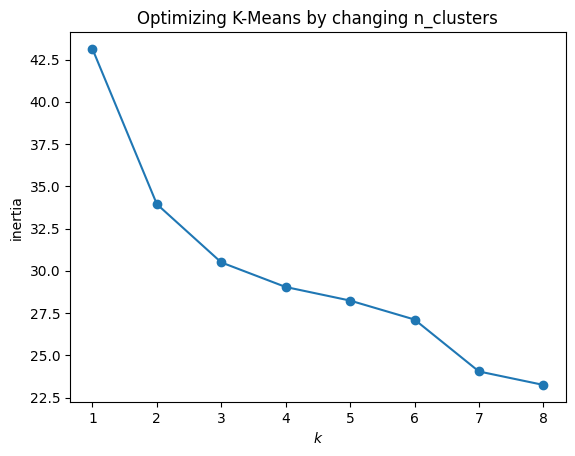

In [14]:
plt.plot(range(1,9), inertia, marker='o')
plt.xlabel('$k$')
plt.ylabel('inertia')
plt.title('Optimizing K-Means by changing n_clusters')
plt.show()

Well, that's interesting, it seems as if 3 clusters is a really poor fit. The doctors might oversimplify things by only differentiating between these 3 types of patients, as the inertia is still decreasing with 5, 6, and even 7 clusters. Redo the process, this time computing and plotting the silhouette score, to test what model actually results in best performance. 

```{note}
Change the range to range(2,9), as silhouette scores require multiple labels, clustering obviously makes no sense with only 1 cluster)
```

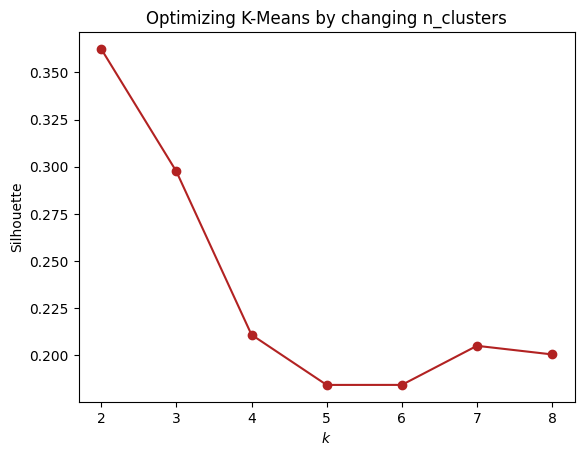

In [16]:
silhouette = []
for k in range(2,9):
    clf = KMeans(n_clusters=k, random_state=42)
    clf.fit(X)
    S = silhouette_score(X, clf.labels_)
    silhouette.append(S)
    
plt.plot(range(2,9), silhouette, marker='o', color='firebrick')
plt.xlabel('$k$')
plt.ylabel('Silhouette')
plt.title('Optimizing K-Means by changing n_clusters')
plt.show()

Now things became even more intersting! Remember that the closer the silhouette score is to 1, the better the model, and silhouette scores around 0 represent large overlap in clusters. What do we see in the figure? I would say when comparing both figures, 7 clusters actually seems the best model, do you agree? 

**Short Recap**

Time for a short evaluation. Hopefully you came to this point of the practical with 30-45 mins left. If not, let's just say you can catch up on sleep after you have completed the Big Data course. You have fitted a K-Means clustering method and optimized it to ensure the best possible fit. 

This was already quite interesting, as we found out that the 3 categories used by the doctor might not be sufficient to explain the variance among patients, maybe a data-driven doctor could even come to a more reliable diagnosis! 

However, before upsetting everyone in a white coat, we should also re-emphasize that clustering is not perfect, and our model definetly had some limimations. For starters, our silhouette scores of around 0.3 indicate a lot of cluster overlap, which is not ideal for diagnosising patients, we might still need that doctor in the end. 

But maybe, we can find a model that performs better than K-Means, and still beat the doctor after all. 

### Assignment 3: Affinity Propagation

K-Means is loved and hated by datascientists in various fields. It is hated because - to say the least - it is not the most elegant model and it is known to be relatively inaccuracte in its clustering. **ALSO, Always keep in mind that clustering is much more subjective and explorative in comparison to supervised learning**. It is loved because it is easy to apply and - most importantly - it is really scalable. Meaning you can apply it to small as well as really large datasets, without requiring a lot of additional runtime. This is important, as fancy models use a lot of their power when you have to wait for 24 hours before they actually compute something. 

Long story short, it is worth our time to check out another option, and see if we can improve our clustering. Our model of choice in this case is *Affinity Propagation*. 

K-Means is a centroid based model that requires you to specify the number of clusters. Opposite to that, Affinity Propagation mathematically determines the similarity between every data point and all other datapoints, and clusters datapoints based on similarity. This model is much more elegant - and thus requires more runtime, i.e. it is computation heavy - and it does require you to specify the number of clusters. It determines it for you based on the data!

**Let's get to it!**

Start by importing `AffinityPropagation` from `sklearn.cluster`

Luckily, we have everything we need preprocessed and inplace already, so we can quickly progress here. Instantiate the model without specifying any arguments, and fit the model to `X`. 

In [ ]:
from sklearn.cluster import AffinityPropagation

clf2 = AffinityPropagation()
clf2.fit(X)

>**The Verdict**
>
>Let's assess how well the affinity propagation model did. As this model is a bit more complex, we do not longer have >access to easily interpretable features like the inertia, but we can still compute the silhouette score, do this for the >Affinity Propagation method you just fitted to the `X` data.

In [18]:
silhouette_score(X, clf2.labels_)

0.17026680656112775

What did you find? The K-Means model might not be that bad after all in this case. However, as said before, unsupervised learning is a bit more subjective in comparison to supervised learning, and therefore difficult to evaluate, especially in the absence of ground truth labels. 

Therefore, it is often used to explore a dataset, as it can be very informative to see what kind of clusters the algorithms comes up with. With the K-Means model, we found out there might actually be 7 clusters instead of 3, let's find out what Affinity Propagation thinks. Start with inspecting the number of labels that have been predicted by determining the length of the cluster_centers_indices_ of the model. 

In [20]:
n_clusters = len(clf2.cluster_centers_indices_)
print(n_clusters)

25


That's is surprising isn't it? The Affinity Propagation concluced there are 25 unique clusters in our dataset, no wonder there is some overlap between these clusters! 

This once more shows that it is a bit unfair to compare two clustering algorithms based only on metrics, as Affinity Propagation actually tells a completely different story. The moral of this one being that patients are unique human beings and a 'Normal' person doesn't really exist, we are all special snowflakes, with our own little cluster. Or something like that...

Let's end this part by visualizing the different clusters. You get this one from us, but feel free to inspect the code. As you can see, this results in true abstract works of art. FYI, axises in these kinds of visualization don't make much sense, as the fact that we cluster based on 6 features actually means we are clustering in a 6-D space, which is impossible for us to see.  

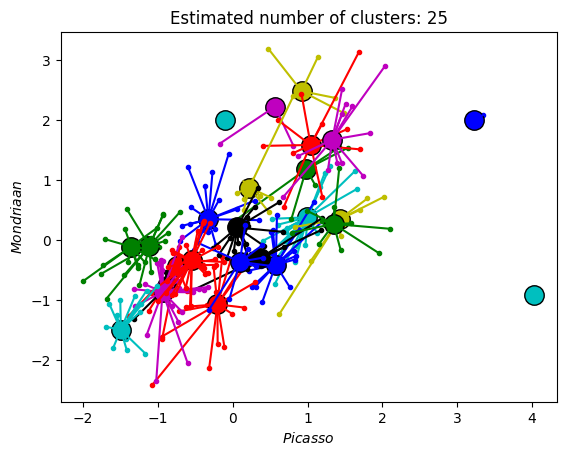

In [22]:
from itertools import cycle
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')

for k, col in zip(range(n_clusters), colors):
    class_members = clf2.labels_ == k
    cluster_center = X[clf2.cluster_centers_indices_[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters)
plt.xlabel('$Picasso$')
plt.ylabel('$Mondriaan$')
plt.show()

### Assignment 4: clustering triathletes

Now, for the last part of this pratical, you get one more task. You will be working with a dataset of all male finishers of the DATEV 2018 Challenge Roth: A famous triathlon over *Ironman* distance. Multiple world records have been set here in the past, and 1000s of people compete every year. 

As you know, triathlons consist of swimming, running and cycling. Some people might be really good at swimming, while others are good at running or cycling. your task: cluster different types of triathletes. 

**Instructions**

As you are all data wizards at this point, we are not going to give you much. We have made life a bit easier for you by preparing a dataset. This dataset only has columns on the total time, swim, cycling and run time of every athlete, and we have deleted personal information. We have been kind enough to change the times to seconds, as this works easier, and clean up column names and encoding. The rest is up to you. You can find some detailed instructions below:

1. Load the Swim_Bike_Run csv file and inspect it as you are used to. 
2. Deal with missing data. Do this however you like it, as long as you deal with it.
3. Do some EDA on your data, i.e. visualize what you have to get an idea of what you are dealing with. 
4. Prepare your dataset for clustering. We are interested in clustering athletes based on what they are good at, **We good do this will controlling for overall performance, but you could also just look for absolute performance on sub-categories, that is up to you**. One way to do this is by computing for example Bike_Time relative to the total time. 
5. Scale the features using a StandardScaler (use max. 3 columns for features). 
6. Cool, you are good to go. Find out the best overall clustering algorithm using the knowledge learned in this practical. Think hard about the number of clusters, you might only want 3 clusters (good swimmers, good cyclers, good runners), but maybe there can be more? People who cycle and swim good but suck at running can be another category for example. **GOOD LUCK**

       Total_Time  Swim_Time  Bike_Time  Run_Time
place                                            
1         27983.0     2879.0    14849.0   10065.0
2         28386.0     2870.0    15107.0   10220.0
3         28478.0     2871.0    15544.0    9892.0
4         28617.0     2957.0    15736.0    9747.0
5         28697.0     2879.0    14737.0   10902.0
       Total_Time  Swim_Time  Bike_Time  Run_Time
place                                            
2419      57152.0     5099.0    25247.0   25707.0
2420      57880.0     5971.0    26190.0   24394.0
2421      58299.0     5366.0    25733.0   26319.0
2422      58579.0     4965.0    28568.0   24179.0
2423      58958.0     5715.0    26781.0   23761.0
<class 'pandas.core.frame.DataFrame'>
Index: 2423 entries, 1 to 2423
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Total_Time  2423 non-null   float64
 1   Swim_Time   2422 non-null   float64
 2   Bike_Time   2419 non-null   fl

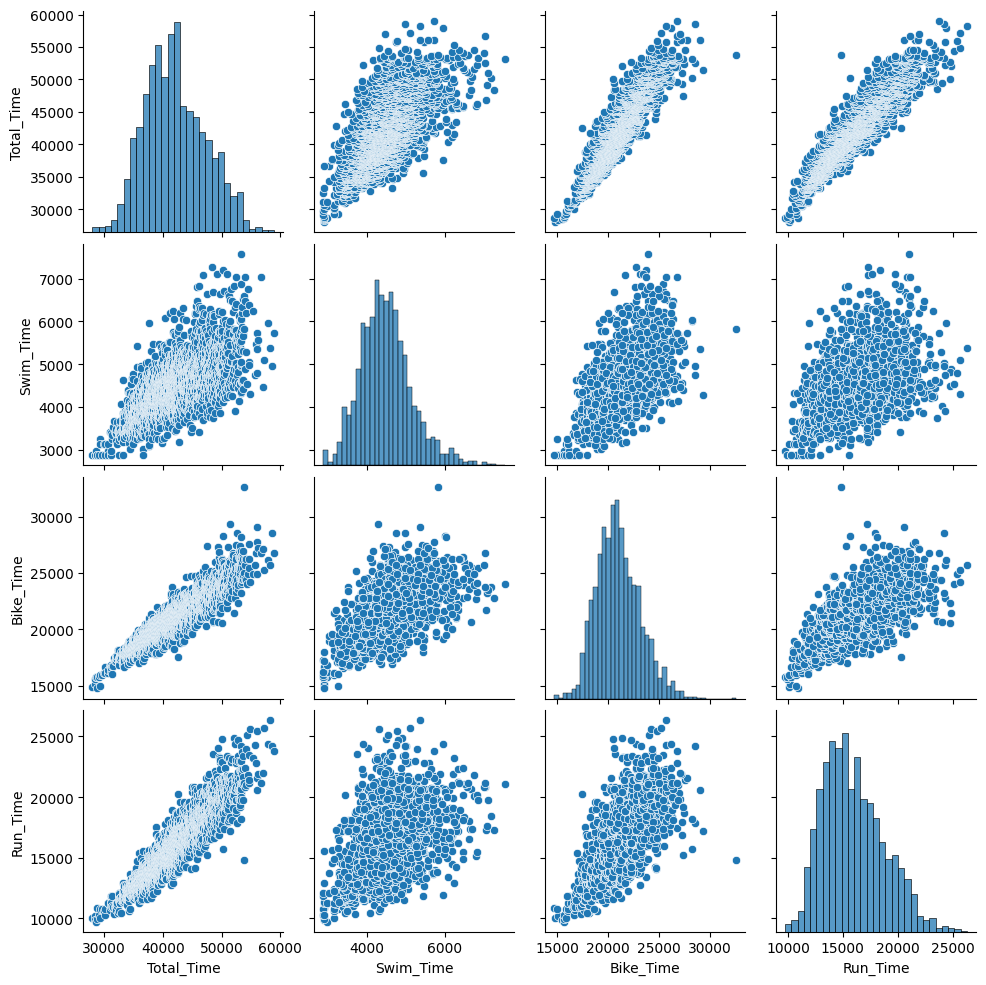

In [ ]:
file_name = 'Swim_Bike_Run.csv'

df_tri = pd.read_csv(os.path.join(os.getcwd(), file_name), index_col=0)
print(df_tri.head())
print(df_tri.tail())
print(df_tri.info())
print(df_tri.describe())

df_tri = df_tri.dropna()
df_tri = df_tri[~df_tri.index.duplicated()]
sns.pairplot(df_tri)
plt.show()

In [24]:
df_tri['Rel_Swim_Time'] = (df_tri['Swim_Time']/df_tri['Total_Time'])*100
df_tri['Rel_Run_Time'] = (df_tri['Bike_Time']/df_tri['Total_Time'])*100
df_tri['Rel_Cycling_Time'] = (df_tri['Run_Time']/df_tri['Total_Time'])*100

In [25]:
cols = ['Rel_Swim_Time', 'Rel_Run_Time', 'Rel_Cycling_Time']
X_tri = df_tri[cols]
X_tri = scaler.fit_transform(X_tri)

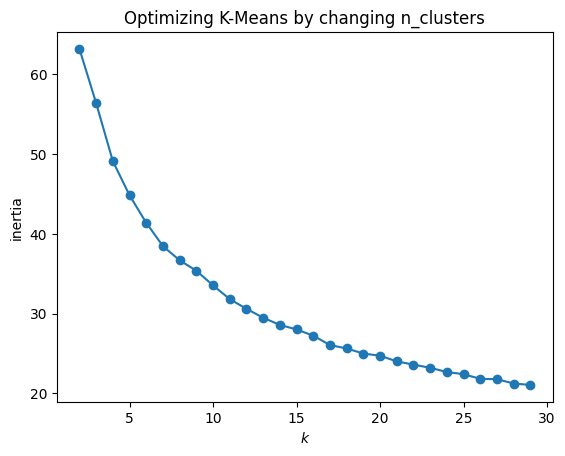

In [27]:
inertia_tri = []
for k in range(2,30):
    clf_tri = KMeans(n_clusters=k)
    clf_tri.fit(X_tri)
    msd = clf_tri.inertia_
    rmsd = np.sqrt(msd)
    inertia_tri.append(rmsd)
    
plt.plot(range(2,30), inertia_tri, marker='o')
plt.xlabel('$k$')
plt.ylabel('inertia')
plt.title('Optimizing K-Means by changing n_clusters')
plt.show()

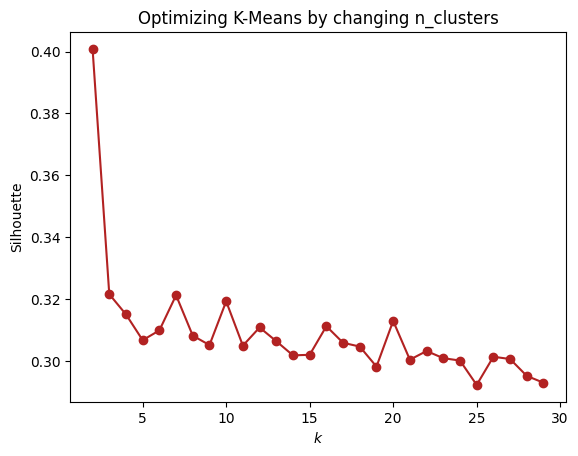

In [28]:
silhouette_tri = []
for k in range(2,30):
    clf_tri = KMeans(n_clusters=k)
    clf_tri.fit(X_tri)
    S = silhouette_score(X_tri, clf_tri.labels_)
    silhouette_tri.append(S)
    
plt.plot(range(2,30), silhouette_tri, marker='o', color='firebrick')
plt.xlabel('$k$')
plt.ylabel('Silhouette')
plt.title('Optimizing K-Means by changing n_clusters')
plt.show()

In [ ]:
clf_tri_2 = AffinityPropagation()
clf_tri_2.fit(X_tri)
Score_AF_tri = silhouette_score(X_tri, clf_tri_2.labels_)
n_clusters_tri = len(clf_tri_2.cluster_centers_indices_)
print(Score_AF_tri, n_clusters_tri)